# H&M 패션 데이터 분석
## Clustering을 통해 고객군별로 맞춤 서비스 제공

In [ ]:
#기본 라이브러리 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#데이터셋 준비
df_cus = pd.read_csv('../data/customers.csv')
df_tra = pd.read_csv('../data/transactions_train.csv')

# 데이터 탐색

## 1 ) 고객 데이터

In [ ]:
df_cus.info() 
#고객 데이터 구조 확인
#약 137만명의 고객 데이터
#7개의 feature : 고객ID, FN, Active, 클럽회원여부, 패션뉴스빈도, 연령, 우편주소
#특징 : 개인정보 암호화(고객ID, 우편주소), 대부분의 feature에 결측치 존재
#한계점 : feature FN과 Active의 의미 불명 --> 해당 열 제거 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
df_cus.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
#고객 데이터의 FN, Active 변수는 무엇을 의미하는지 확인이 되지 않음 --> 해당 열 제거
#postal_code는 암호화된 우편주소로 활용이 어렵다고 판단 --> 해당 열 제거
df_cus.drop(['FN', 'Active', 'postal_code'], axis=1, inplace=True)
df_cus.head()

,customer_id,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0


In [ ]:
#결측치 확인
print(df_cus.isnull().sum())

#결측치를 근거없이 다른 값으로 대체하는 것은 데이터를 왜곡할 위험이 존재한다.
#결측치를 포함하는 열 16009개는 137만명의 고객 데이터 중 1.17%에 해당하므로 행삭제의 영향이 미미하다.--> 결측치 포함 행 제거

df_cus.dropna(axis=0, inplace=True)
df_cus.isnull().sum()

customer_id                   0
club_member_status         6062
fashion_news_frequency    16009
age                       15861
dtype: int64


customer_id               0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

In [ ]:
#고객 데이터의 범주형 변수 'club_member_status'와 'fashion_news_frequency'의 범주 확인
for idx, var_name in enumerate(df_cus.columns):    
    if var_name == 'customer_id':
        continue

    if df_cus[var_name].dtype == 'object':
        _set = set(df_cus[var_name])
        _nums = len(_set)

        print("{} {}  : 총 {} 종류 {}".format(idx, var_name, _nums, _set))

1 club_member_status  : 총 3 종류 {'ACTIVE', 'PRE-CREATE', 'LEFT CLUB'}
2 fashion_news_frequency  : 총 4 종류 {'Regularly', 'None', 'NONE', 'Monthly'}


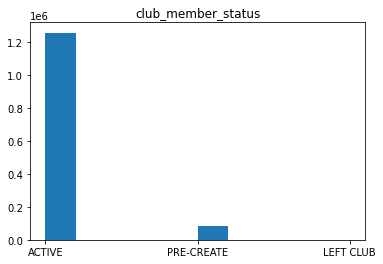

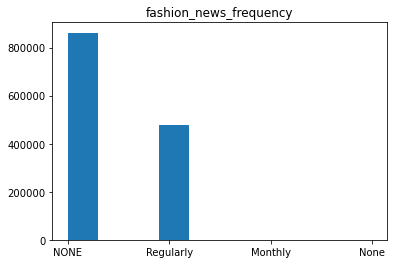

In [ ]:
#fashion_news_frequency에 같은 이름의 범주가 있음을 확인 (None, NONE)
#히스토그램
x = df_cus['club_member_status']
plt.hist(x)
plt.title('club_member_status')
plt.show()


y = df_cus['fashion_news_frequency']
plt.hist(y)
plt.title('fashion_news_frequency')
plt.show()

In [ ]:
#도수세기
print(x.value_counts())
print(y.value_counts()) #None이 단 두개 밖에 없음을 확인

ACTIVE        1254398
PRE-CREATE      83708
LEFT CLUB         464
Name: club_member_status, dtype: int64
NONE         861838
Regularly    475894
Monthly         836
None              2
Name: fashion_news_frequency, dtype: int64


In [ ]:
#None 제거
indexs = df_cus.loc[df_cus['fashion_news_frequency']=='None'].index
df_cus.drop(indexs, axis=0, inplace=True)
df_cus['fashion_news_frequency'].value_counts()

NONE         861838
Regularly    475894
Monthly         836
Name: fashion_news_frequency, dtype: int64

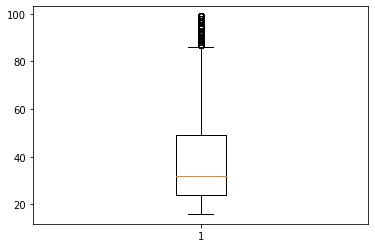

제1사분위수 : 24.0
평균 : 32.0
제3사분위수 : 49.0
q3+1.5IQR : 86.5


In [ ]:
#Age 분포 확인
x = df_cus['age']

plt.boxplot(x)
plt.show()


q1 = x.quantile(0.25)
q2 = x.quantile(0.5)
q3 = x.quantile(0.75)
IQR = q3 - q1

print(f"제1사분위수 : {q1}")
print(f"평균 : {q2}")
print(f"제3사분위수 : {q3}")

outlier = q3+1.5*IQR
print(f"q3+1.5IQR : {outlier}")

#H&M은 20~34살의 여성을 target customer로 하는 casual fast fashion 브랜드임에도 연령분포가 넓게 나타나는 것을 확인
#참조 : https://eduzaurus.com/free-essay-samples/the-target-market-of-hm/

208


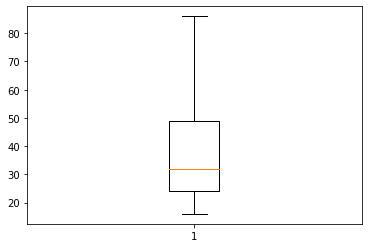

In [ ]:
#이상치 제거
#연령 이상치는 고객의 오기입이나 장난일 가능성이 있으며, 그 수가 전체 데이터에 비해 매우 적음(208명) --> 행 제거
print(len(df_cus[df_cus['age'] > outlier])) #208명

indexs = df_cus.loc[df_cus['age']>outlier].index
df_cus.drop(indexs, axis=0, inplace=True)

x = df_cus['age']
plt.boxplot(x)
plt.show()

In [ ]:
#H&M에게 유의미한 집단은 젊은 층이라고 판단 제 3사분위수를 기준으로 두 집단으로 분류
df_cus.loc[df_cus['age'] <= q3, 'age_group'] = 'Target customer'
df_cus.loc[df_cus['age'] > q3, 'age_group'] = 'Non-target customer'

df_cus['age_group'].value_counts() #Target customer는 Non-target customer의 약 3배 --> data imblance 유의

Target customer        1025122
Non-target customer     313238
Name: age_group, dtype: int64

In [ ]:
#수정된 데이터셋 저장
df_cus.to_csv('../data/df_cus.csv', index=False)

In [ ]:
pd.read_csv('../data/df_cus.csv')

,customer_id,club_member_status,fashion_news_frequency,age,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,Target customer
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,Target customer
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,Target customer
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,Non-target customer
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,Non-target customer
...,...,...,...,...,...
1338355,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,NONE,24.0,Target customer
1338356,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,NONE,21.0,Target customer
1338357,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,Regularly,21.0,Target customer
1338358,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,Regularly,18.0,Target customer


## 2) 거래 데이터

In [ ]:
df_tra.info() 
#거래 데이터 구조 확인
#약 3178만 건의 거래 데이터
#5개의 변수 : 거래날짜, 고객ID, 상품ID, 가격, 판매채널
#특징 : 익명처리(고객ID, 가격) --> 가격은 영수증과 같은 추가 정보와 결합되어 개인 특정 가능성이 존재
#한계점 : 가격은 고객의 수요 특성을 이해하는데 가장 중요한 변수이나 익명화 처리되어 정보가 훼손됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
df_tra.head() #2018년 09월 20일부터

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
df_tra.tail(10) #2020년 09월 22일까지 약 3년 간의 거래 데이터

,t_dat,customer_id,article_id,price,sales_channel_id
31788314,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,701472004,0.010153,2
31788315,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,456163087,0.033881,2
31788316,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,832505003,0.025407,2
31788317,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,902288001,0.022017,2
31788318,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,856440002,0.042356,2
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2


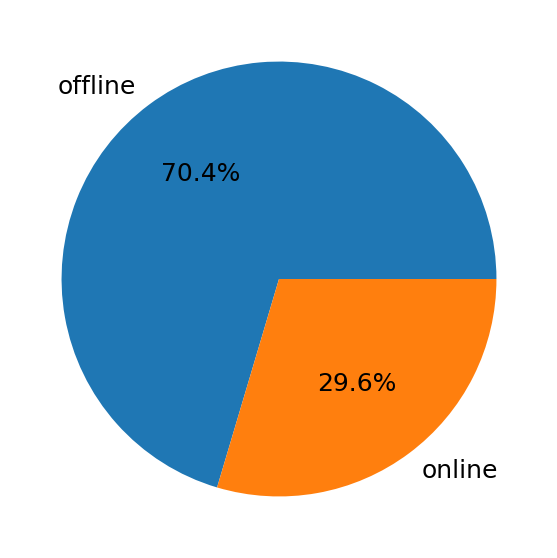

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64


In [ ]:
#유통채널 비중
x = df_tra['sales_channel_id'].value_counts()

labels = ['offline', 'online']

plt.figure(figsize=(10, 10))
plt.pie(x, labels=labels, autopct='%.1f%%', textprops={'fontsize': 25})
plt.show()

print(df_tra['sales_channel_id'].value_counts())

#오프라인 채널이 주된 유통채널

In [ ]:
#날짜변수 datatime64로 타입변경
df_tra['t_dat']=pd.to_datetime(df_tra['t_dat'])

#날짜 관련 새로운 열 생성
df_tra['t_year']=df_tra['t_dat'].dt.year
df_tra['t_month']=df_tra['t_dat'].dt.month
df_tra['t_day']=df_tra['t_dat'].dt.day
df_tra['t_dayname']=df_tra['t_dat'].dt.day_name() #요일

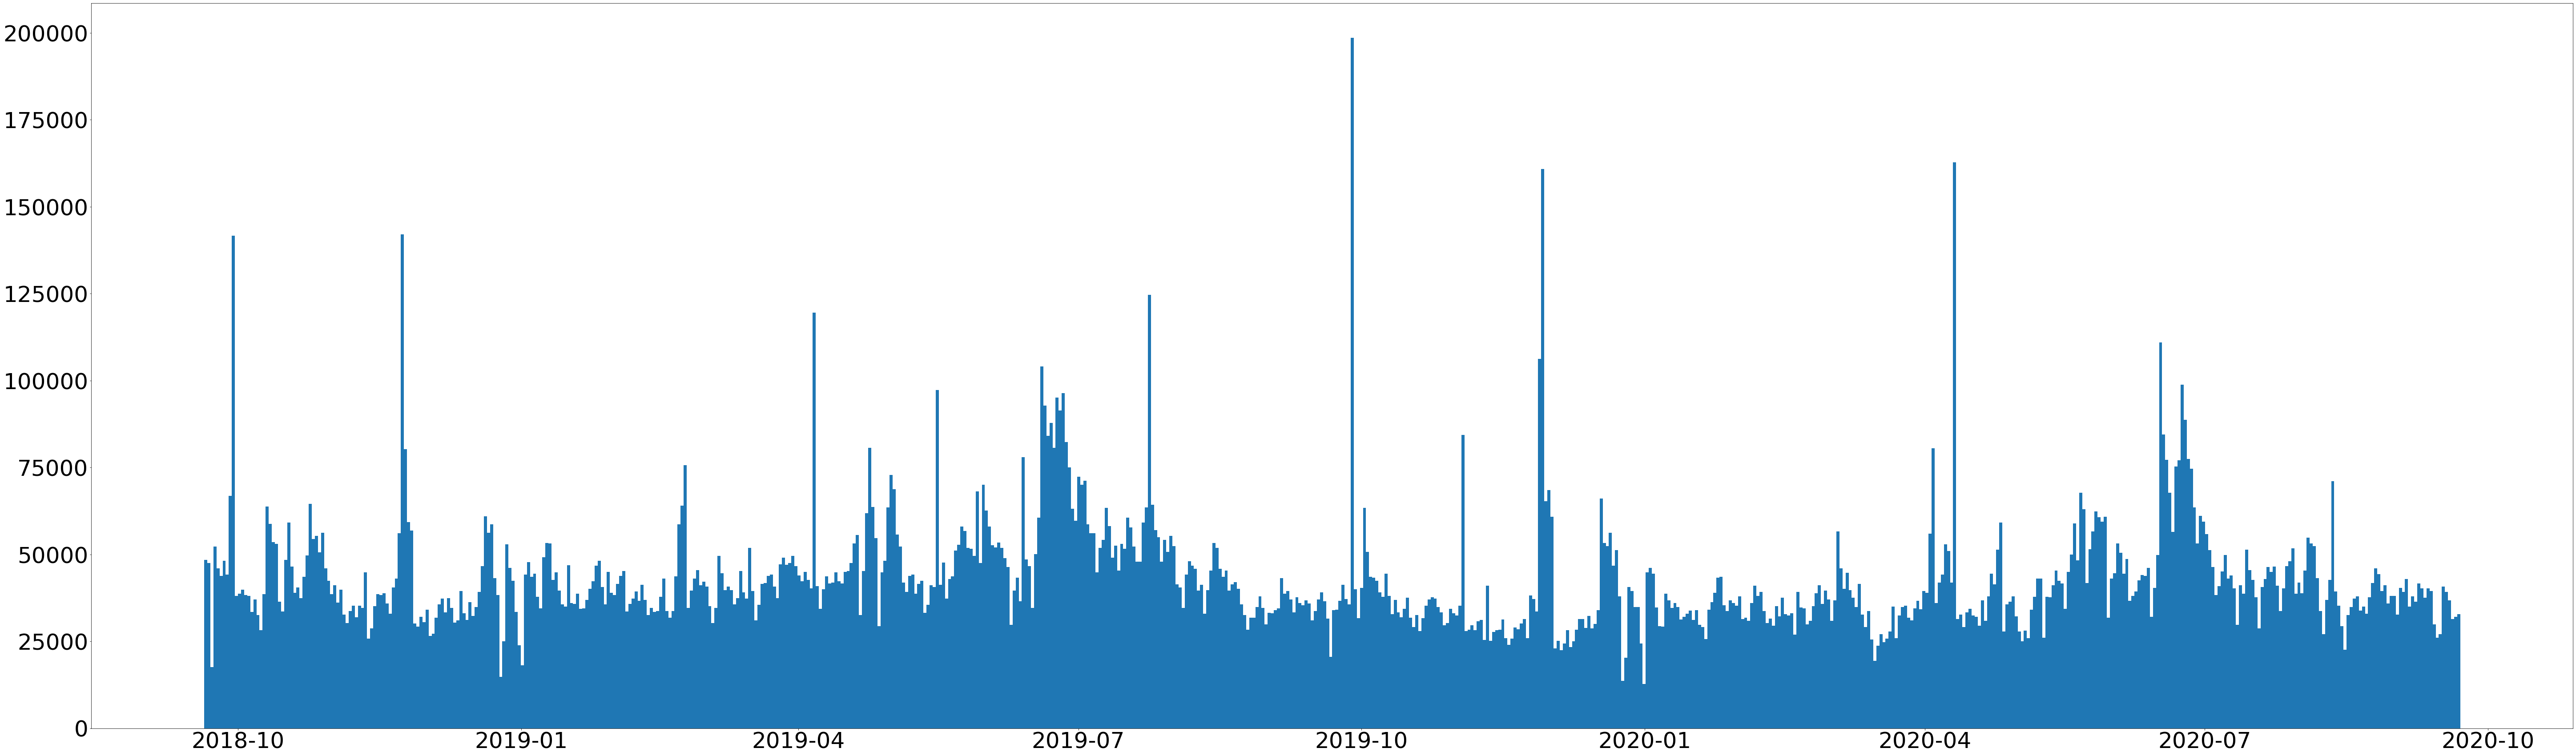

In [ ]:
#일별 거래량 분포
x = df_tra['t_dat']

bins = len(set(x))
plt.figure(figsize=(100, 30))
plt.hist(x, bins=bins)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

In [ ]:
x.value_counts()

2019-09-28    198622
2020-04-11    162799
2019-11-29    160875
2018-11-23    142018
2018-09-29    141700
               ...  
2019-01-01     18145
2018-09-22     17635
2018-12-25     14799
2019-12-25     13637
2020-01-01     12760
Name: t_dat, Length: 734, dtype: int64

In [ ]:
x.value_counts(bins=3)  #bins 정수. Series 객체의 값 범위가 분할 된 파티션 수

#2020년의 거래량이 다른 년도에 비해 감소함.
#H&M은 오프라인이 주된 유통채널인데 코로나로 인해 고객의 매장 방문이 감소한 것이 원인으로 보임.

(2019-05-22 08:00:00, 2020-01-21 16:00:00]              10867028
(2018-09-19 06:24:28.799999999, 2019-05-22 08:00:00]    10644037
(2020-01-21 16:00:00, 2020-09-22]                       10277259
Name: t_dat, dtype: int64

In [ ]:
df_tra.groupby(['sales_channel_id', 't_year']).count()

t_dat  customer_id  article_id     price  \
sales_channel_id t_year                                                
1                2018     1432727      1432727     1432727   1432727   
                 2019     4999530      4999530     4999530   4999530   
                 2020     2976205      2976205     2976205   2976205   
2                2018     2978535      2978535     2978535   2978535   
                 2019    11397400     11397400    11397400  11397400   
                 2020     8003927      8003927     8003927   8003927   

                          t_month     t_day  t_dayname  price(dollar)  
sales_channel_id t_year                                                
1                2018     1432727   1432727    1432727        1432727  
                 2019     4999530   4999530    4999530        4999530  
                 2020     2976205   2976205    2976205        2976205  
2                2018     2978535   2978535    2978535        2978535  
                 2019    11397400  11397400   11397400       11397400  
                 2020     8003927   8003927    8003927        8003927

In [ ]:
#월별 거래량 분포
df_tra['t_month'].value_counts()

#겨울에 적고, 여름에 거래량이 많음
#H&M은 패스트패션 브랜드로 저렴한 가격대가 특징이다.
#가격이 저렴하면 의류는 좋은 옷감을 사용하기가 어렵고 특히 두꺼운 원단은 원가가 비싼 경우가 많다.
#실제로 H&M은 겨울옷을 많이 팔지 않으며 판매가도 높게 책정되어 매력도가 떨어진다.

6     3670709
7     3158996
5     2922134
4     2817336
9     2620223
10    2543812
8     2490722
11    2468652
1     2339825
3     2334502
12    2267142
2     2154271
Name: t_month, dtype: int64

In [ ]:
#주별 거래량 분포
df_tra['t_day'].value_counts(bins=4) #월중이 가장 적고, 월말, 월초의 거래량이 가장 많음

(23.5, 31.0]    8616155
(0.969, 8.5]    8055004
(8.5, 16.0]     7578764
(16.0, 23.5]    7538401
Name: t_day, dtype: int64

In [ ]:
#요일별 거래량 분포
df_tra['t_dayname'].value_counts() 
#일요일, 월요일에 가장 적고, 토요일, 목요일의 거래량이 가장 많음
#목요일의 거래량이 두드러진다는 것은 의외의 결과로 해석됨
#목요일에 이벤트나 행사를 하면 보다 많은 고객에게 접근할 수 있음을 시사

Saturday     5049500
Thursday     4860595
Wednesday    4842821
Friday       4749132
Tuesday      4198630
Monday       4054054
Sunday       4033592
Name: t_dayname, dtype: int64

<span style="color:red">가격은 상품의 수요에 있어서 매우 중요한 변수</span>

In [ ]:
#거래데이터의 price 변수는 상품의 수요에 있어서 매우 중요한 변수로 판단하고 복구를 시도
df_tra['price'].describe().apply(lambda x: format(x, 'f'))

#과학적 표기법 해제
#참조 : https://yingqusp.com/so/python/176961

count    31788324.000000
mean            0.027829
std             0.019181
min             0.000017
25%             0.015814
50%             0.025407
75%             0.033881
max             0.591525
Name: price, dtype: object

In [ ]:
#거래데이터의 마지막 10개 행에 해당되는 상품을 H&M 사이트에서 검색하여 가격을 조사
#https://www2.hm.com/en_us/index.html
#변수 'dollar' : 출시가
#변수 'sales price' : 판매가 (할인된 가격)
df_norm = pd.read_csv('../data/normalization.csv')
df_norm.head(10)

,article_id,price,dollar,sales price
0,701472004,0.010153,9.99,5.99
1,456163087,0.033881,19.99,NaN
2,832505003,0.025407,17.99,NaN
3,902288001,0.022017,14.99,8.99
4,856440002,0.042356,29.99,22.99
5,929511001,0.059305,39.99,22.99
6,891322004,0.042356,29.99,15.99
7,918325001,0.043203,34.99,21.99
8,833459002,0.006763,9.99,NaN
9,898573003,0.033881,24.99,10.99


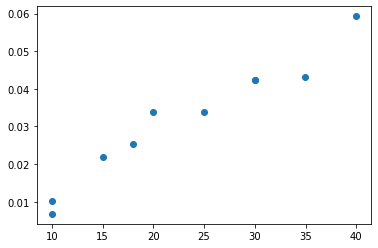

In [ ]:
#기존 거래데이터의 price와 H&M사이트에서 찾은 가격 간에 선형관계가 있음을 확인
X = df_norm['dollar']
y = df_norm['price']

plt.scatter(X, y)

#한계점 : 상품 10개만을 가지고 price와 dollar 사이에 선형관계가 존재한다고 결론 내리는 것은 섣부른 판단일 수 있음.
#after work : 웹 크롤링을 통해 중심극한정리에 근거하여 최소 30개 이상의 상품에 대한 출시가(dollar)를 획득

In [ ]:
#선형회귀모델을 통해 파라미터를 구한다.
from sklearn.linear_model import LinearRegression

X = X[:,np.newaxis]

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.intercept_)
print(reg.coef_)

0.9438456079954889
-0.0032836532481187453
[0.00151206]


C:\Users\12182\AppData\Local\Temp/ipykernel_11932/1138977523.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


In [ ]:
#역산하여 예상가격을 구하고 데이터셋에 새로운 열(price(dollar))로 포함시킨다.
df_tra['price(dollar)']=( df_tra['price'] - reg.intercept_ ) / reg.coef_

In [ ]:
df_tra.head()

,t_dat,customer_id,article_id,price,sales_channel_id,t_year,t_month,t_day,t_dayname,price(dollar)
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018,9,20,Thursday,35.788394
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018,9,20,Thursday,22.337210
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018,9,20,Thursday,12.248822
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018,9,20,Thursday,13.369754
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018,9,20,Thursday,13.369754


In [ ]:
#고객별 거래횟수 파악
df_tra['customer_id'].value_counts()

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
                                                                    ... 
63b70b71291668f0a63ade8e321fb3eccb80eba164f2087dad471de065f18e1f       1
950b172c36d169bf427545991fe66371f21a085799b44780fdcb2da6a3091613       1
7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3eaadc21993ea45fc69       1
62d49d0ae11a4f65fa31e354cb87f6b557ebec648e0e5e71435d2dd190d1ccc4       1
268eaa31a07d6f2f4f060bfcf32a660f3ea3dbb21ef14cd09fc2545f4e0b5c10       1
Name: customer_id, Length: 1362281, dtype: int64

In [ ]:
#고객별 거래횟수 데이터프레임화
df_sales = pd.DataFrame(df_tra['customer_id'].value_counts())
df_sales.reset_index(inplace=True)
df_sales.columns = ['customer_id', '#Transactions']

df_sales

,customer_id,#Transactions
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441
2,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364
3,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361
4,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237
...,...,...
1362276,63b70b71291668f0a63ade8e321fb3eccb80eba164f208...,1
1362277,950b172c36d169bf427545991fe66371f21a085799b447...,1
1362278,7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3...,1
1362279,62d49d0ae11a4f65fa31e354cb87f6b557ebec648e0e5e...,1


In [ ]:
#고객별 지불액수 --> 계산이 끝나질 않음 (약 10시간 돌림)
# total_sales = df_tra['customer_id'].groupby(df_tra['price(dollar)']).sum()

In [ ]:
# df_total_sales = pd.DataFrame(total_sales)

# Clustering 준비

In [ ]:
# 오프라인 고객은 오프라인에서만 구매하고, 온라인 고객은 온라인에서만 구매한다는 강한 가정을 세움
# 각 customer가 첫번째 거래에서 이용한 channel을 주로 이용하는 유통채널로 파악
df_tra2 = df_tra.drop_duplicates(['customer_id'])

#거래횟수와 결합
df_tra2 = pd.DataFrame({'customer_id' : df_tra2['customer_id'],
                      'sales_channel_id' : df_tra2['sales_channel_id']})
df_tra3 = pd.merge(df_sales, df_tra2)

In [ ]:
#고객데이터와 결합
df_cus = pd.read_csv('../data/df_cus.csv')

df_cus = pd.merge(df_cus, df_tra3)

df_cus

,customer_id,club_member_status,fashion_news_frequency,age,age_group,#Transactions,sales_channel_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,Target customer,21,1
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,Target customer,86,2
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,Target customer,18,2
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,Non-target customer,2,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,Non-target customer,13,1
...,...,...,...,...,...,...,...
1328774,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,NONE,24.0,Target customer,51,2
1328775,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,NONE,21.0,Target customer,84,1
1328776,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,Regularly,21.0,Target customer,45,1
1328777,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,Regularly,18.0,Target customer,7,2


In [ ]:
#one hot encoding을 통해 범주형 변수를 binary 더미변수들로 변환
from sklearn.preprocessing import OneHotEncoder

def OHE(x):
    X = x[:, np.newaxis]

    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(X)

    print(enc.categories_)

    return enc.transform(X).toarray()

OHE_stat = OHE(df_cus['club_member_status'])
OHE_freq = OHE(df_cus['fashion_news_frequency'])
OHE_agegrp = OHE(df_cus['age_group'])
OHE_channel = OHE(df_cus['sales_channel_id'])

df_OHE = pd.DataFrame(np.hstack([OHE_stat, OHE_freq, OHE_agegrp, OHE_channel]))

df_OHE.columns = ['ACTIVE', 'LEFTCLUB', 'PRE-CREATE','Monthly', 'None', 'Regularly',
                  'Non-Target', 'Target', 'online', 'offline']

df_OHE

C:\Users\12182\AppData\Local\Temp/ipykernel_11932/1935160306.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]
C:\Users\12182\AppData\Local\Temp/ipykernel_11932/1935160306.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]


[array(['ACTIVE', 'LEFT CLUB', 'PRE-CREATE'], dtype=object)]
[array(['Monthly', 'NONE', 'Regularly'], dtype=object)]


C:\Users\12182\AppData\Local\Temp/ipykernel_11932/1935160306.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]
C:\Users\12182\AppData\Local\Temp/ipykernel_11932/1935160306.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]


[array(['Non-target customer', 'Target customer'], dtype=object)]
[array([1, 2], dtype=int64)]


,ACTIVE,LEFTCLUB,PRE-CREATE,Monthly,None,Regularly,Non-Target,Target,online,offline
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1328774,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1328775,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1328776,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1328777,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
df_cus2 = pd.concat([df_cus, df_OHE], axis=1)
df_cus2

,customer_id,club_member_status,fashion_news_frequency,age,age_group,#Transactions,sales_channel_id,ACTIVE,LEFTCLUB,PRE-CREATE,...,ACTIVE,LEFTCLUB,PRE-CREATE,Monthly,None,Regularly,Non-Target,Target,online,offline
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,Target customer,21,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,Target customer,86,2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,Target customer,18,2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,Non-target customer,2,2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,Non-target customer,13,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328774,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,NONE,24.0,Target customer,51,2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1328775,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,NONE,21.0,Target customer,84,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1328776,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,Regularly,21.0,Target customer,45,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1328777,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,Regularly,18.0,Target customer,7,2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
df_cus3 = df_cus2.drop(['customer_id', 'club_member_status', 'fashion_news_frequency', 'age_group', 'sales_channel_id'], axis=1)

df_cus3

,age,#Transactions,ACTIVE,LEFTCLUB,PRE-CREATE,Monthly,None,Regularly,Non-Target,Target,ACTIVE,LEFTCLUB,PRE-CREATE,Monthly,None,Regularly,Non-Target,Target,online,offline
0,49.0,21,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,25.0,86,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,24.0,18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,54.0,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,52.0,13,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328774,24.0,51,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1328775,21.0,84,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1328776,21.0,45,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1328777,18.0,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
#단위의 영향을 없애기 위해 Scaling
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
fitted=std_scaler.fit(df_cus3)
df_cus_normalized=std_scaler.transform(df_cus3)

df_cus_normalized = pd.DataFrame(df_cus_normalized, columns=df_cus3.columns)
# df_cus_normalized

# Clustering

In [ ]:
#참조 : https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

여러 Clustering 방법을 사용하여 고객집단을 군집화

여러 method에서 동일한 군집화 결과가 나오는 것이 Best Result이며, 서로 다른 양상을 보이면 그 중에서 해석이 가장 용이한 method를 선택

## 1) Clustering - Gaussian Mixture Model

고객집단을 가장 잘 분류하는 군집수는 몇인지 알아내기 위해서 군집수 2부터 7까지 설정하고 분석

- mixed는 여러 범주가 섞인 것으로 아직 분류가 덜 된 것일 수도 있고 그 자체로 군집의 특성일 수도 있다.

- 노란색 형광을 칠한 칸은 해당 clustering에서 이전 clustering과 대조되는 유의미한 변화를 표시한 것이다.

- 군집수가 7일 때 모든 변수에 대한 유의미한 변화가 한번씩 나타난 것으로 판단하고 n_components를 7로 설정

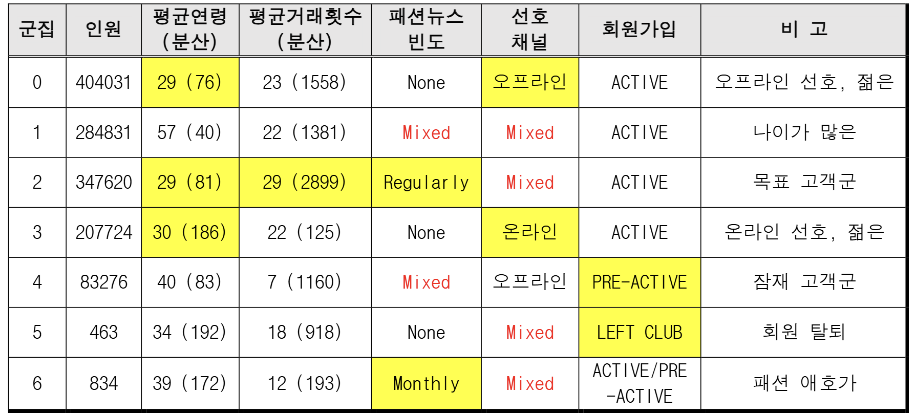

In [ ]:
#Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

X = df_cus_normalized.to_numpy()

gm = GaussianMixture(n_components=7, random_state=100).fit(X) #군집수를 2에서 10까지 설정하고 분석한 결과 7가 가장 해석에 용이
predictions = gm.predict(X)

gmm_cluter_labels = pd.Series(predictions)
df_cus2['gmm_cluter_labels'] = gmm_cluter_labels

df_cus2

,customer_id,club_member_status,fashion_news_frequency,age,age_group,#Transactions,sales_channel_id,ACTIVE,LEFTCLUB,PRE-CREATE,...,LEFTCLUB,PRE-CREATE,Monthly,None,Regularly,Non-Target,Target,online,offline,gmm_cluter_labels
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,Target customer,21,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,Target customer,86,2,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,Target customer,18,2,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,Non-target customer,2,2,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,Non-target customer,13,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328774,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,NONE,24.0,Target customer,51,2,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1328775,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,NONE,21.0,Target customer,84,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3
1328776,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,Regularly,21.0,Target customer,45,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2
1328777,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,Regularly,18.0,Target customer,7,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2


In [ ]:
df_cus2['gmm_cluter_labels'].value_counts()

0    404031
2    347620
1    284831
3    207724
4     83276
6       834
5       463
Name: gmm_cluter_labels, dtype: int64

In [ ]:
#그룹핑
grouped = df_cus2.groupby('gmm_cluter_labels')

In [ ]:
#그룹별 연령 평균
grouped.mean()['age']

gmm_cluter_labels
0    29.417515
1    57.210075
2    29.854068
3    30.398952
4    40.850341
5    34.012959
6    39.676259
Name: age, dtype: float64

In [ ]:
#그룹별 거래횟수 평균
grouped.mean()['#Transactions']

gmm_cluter_labels
0    23.135653
1    22.274198
2    29.946303
3    22.831989
4     7.270618
5    18.395248
6    12.334532
Name: #Transactions, dtype: float64

In [ ]:
#그룹별 선호 채널
df_cus2.groupby(['gmm_cluter_labels', 'sales_channel_id']).count() #2 : offline / 1 : online

customer_id  club_member_status  \
gmm_cluter_labels sales_channel_id                                    
0                 2                      404031              404031   
1                 1                      115408              115408   
                  2                      169423              169423   
2                 1                      139308              139308   
                  2                      208312              208312   
3                 1                      207724              207724   
4                 1                          61                  61   
                  2                       83215               83215   
5                 1                          40                  40   
                  2                         423                 423   
6                 1                         459                 459   
                  2                         375                 375   

                                    fashion_news_frequency     age  age_group  \
gmm_cluter_labels sales_channel_id                                              
0                 2                                 404031  404031     404031   
1                 1                                 115408  115408     115408   
                  2                                 169423  169423     169423   
2                 1                                 139308  139308     139308   
                  2                                 208312  208312     208312   
3                 1                                 207724  207724     207724   
4                 1                                     61      61         61   
                  2                                  83215   83215      83215   
5                 1                                     40      40         40   
                  2                                    423     423        423   
6                 1                                    459     459        459   
                  2                                    375     375        375   

                                    #Transactions  ACTIVE  LEFTCLUB  \
gmm_cluter_labels sales_channel_id                                    
0                 2                        404031  404031    404031   
1                 1                        115408  115408    115408   
                  2                        169423  169423    169423   
2                 1                        139308  139308    139308   
                  2                        208312  208312    208312   
3                 1                        207724  207724    207724   
4                 1                            61      61        61   
                  2                         83215   83215     83215   
5                 1                            40      40        40   
                  2                           423     423       423   
6                 1                           459     459       459   
                  2                           375     375       375   

                                    PRE-CREATE  Monthly  ...  ACTIVE  \
gmm_cluter_labels sales_channel_id                       ...           
0                 2                     404031   404031  ...  404031   
1                 1                     115408   115408  ...  115408   
                  2                     169423   169423  ...  169423   
2                 1                     139308   139308  ...  139308   
                  2                     208312   208312  ...  208312   
3                 1                     207724   207724  ...  207724   
4                 1                         61       61  ...      61   
                  2                      83215    83215  ...   83215   
5                 1                         40       40  ...      40   
                  2                        423      423  ...     423   
6                 1                        459 

In [ ]:
#그룹별 클럽가입여부
df_cus2.groupby(['gmm_cluter_labels', 'club_member_status']).count()

customer_id  fashion_news_frequency  \
gmm_cluter_labels club_member_status                                        
0                 ACTIVE                   404031                  404031   
1                 ACTIVE                   284831                  284831   
2                 ACTIVE                   347620                  347620   
3                 ACTIVE                   207724                  207724   
4                 PRE-CREATE                83276                   83276   
5                 LEFT CLUB                   463                     463   
6                 ACTIVE                      775                     775   
                  PRE-CREATE                   59                      59   

                                         age  age_group  #Transactions  \
gmm_cluter_labels club_member_status                                     
0                 ACTIVE              404031     404031         404031   
1                 ACTIVE              284831     284831         284831   
2                 ACTIVE              347620     347620         347620   
3                 ACTIVE              207724     207724         207724   
4                 PRE-CREATE           83276      83276          83276   
5                 LEFT CLUB              463        463            463   
6                 ACTIVE                 775        775            775   
                  PRE-CREATE              59         59             59   

                                      sales_channel_id  ACTIVE  LEFTCLUB  \
gmm_cluter_labels club_member_status                                       
0                 ACTIVE                        404031  404031    404031   
1                 ACTIVE                        284831  284831    284831   
2                 ACTIVE                        347620  347620    347620   
3                 ACTIVE                        207724  207724    207724   
4                 PRE-CREATE                     83276   83276     83276   
5                 LEFT CLUB                        463     463       463   
6                 ACTIVE                           775     775       775   
                  PRE-CREATE                        59      59        59   

                                      PRE-CREATE  Monthly  ...  ACTIVE  \
gmm_cluter_labels club_member_status                       ...           
0                 ACTIVE                  404031   404031  ...  404031   
1                 ACTIVE                  284831   284831  ...  284831   
2                 ACTIVE                  347620   347620  ...  347620   
3                 ACTIVE                  207724   207724  ...  207724   
4                 PRE-CREATE               83276    83276  ...   83276   
5                 LEFT CLUB                  463      463  ...     463   
6                 ACTIVE                     775      775  ...     775   
                  PRE-CREATE                  59       59  ...      59   

                                      LEFTCLUB  PRE-CREATE  Monthly    None  \
gmm_cluter_labels club_member_status                                          
0                 ACTIVE                404031      404031   404031  404031   
1                 ACTIVE                284831      284831   284831  284831   
2                 ACTIVE                347620      347620   347620  347620   
3                 ACTIVE                207724      207724   207724  207724   
4                 PRE-CREATE             83276       83276    83276   83276   
5                 LEFT CLUB                463         463      463     463   
6                 ACTIVE                   775         775      775     775   
                  PRE-CREATE                59          59       59      59   

                                      Regularly  Non-Target  Target  online  \
gmm_cluter_labels club_member_status                                          
0                 ACTIVE                 404031      404031  404031  404031

In [ ]:
#그룹별 패션뉴스빈도
df_cus2.groupby(['gmm_cluter_labels', 'fashion_news_frequency']).count()

customer_id  club_member_status  \
gmm_cluter_labels fashion_news_frequency                                    
0                 NONE                         404031              404031   
1                 NONE                         165858              165858   
                  Regularly                    118973              118973   
2                 Regularly                    347620              347620   
3                 NONE                         207724              207724   
4                 NONE                          77602               77602   
                  Regularly                      5674                5674   
5                 NONE                            456                 456   
                  Regularly                         7                   7   
6                 Monthly                         834                 834   

                                             age  age_group  #Transactions  \
gmm_cluter_labels fashion_news_frequency                                     
0                 NONE                    404031     404031         404031   
1                 NONE                    165858     165858         165858   
                  Regularly               118973     118973         118973   
2                 Regularly               347620     347620         347620   
3                 NONE                    207724     207724         207724   
4                 NONE                     77602      77602          77602   
                  Regularly                 5674       5674           5674   
5                 NONE                       456        456            456   
                  Regularly                    7          7              7   
6                 Monthly                    834        834            834   

                                          sales_channel_id  ACTIVE  LEFTCLUB  \
gmm_cluter_labels fashion_news_frequency                                       
0                 NONE                              404031  404031    404031   
1                 NONE                              165858  165858    165858   
                  Regularly                         118973  118973    118973   
2                 Regularly                         347620  347620    347620   
3                 NONE                              207724  207724    207724   
4                 NONE                               77602   77602     77602   
                  Regularly                           5674    5674      5674   
5                 NONE                                 456     456       456   
                  Regularly                              7       7         7   
6                 Monthly                              834     834       834   

                                          PRE-CREATE  Monthly  ...  ACTIVE  \
gmm_cluter_labels fashion_news_frequency                       ...           
0                 NONE                        404031   404031  ...  404031   
1                 NONE                        165858   165858  ...  165858   
                  Regularly                   118973   118973  ...  118973   
2                 Regularly                   347620   347620  ...  347620   
3                 NONE                        207724   207724  ...  207724   
4                 NONE                         77602    77602  ...   77602   
                  Regularly                     5674     5674  ...    5674   
5                 NONE                           456      456  ...     456   
                  Regularly                        7        7  ...       7   
6                 Monthly                        834      834  ...     834   

                                          LEFTCLUB  PRE-CREATE  Monthly  \
gmm_cluter_labels fashion_news_frequency                                  
0                 NONE                      404031      404031   404031   
1                 NONE                      165858      1

### GMM Clustering 결과 해석

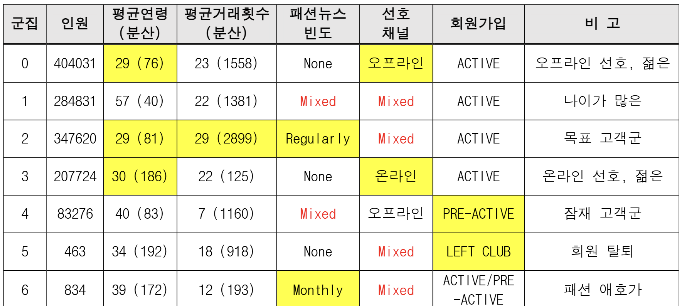

- 목표 고객군 : 회원이면서 연령이 낮고 거래횟수가 많은 H&M의 target customer

군집 2 : 연령이 낮다. / **거래횟수가 많다** / **패션에 관심이 많은 편** / **선호 채널은 Mixed** / 클럽 가입 O

군집 0 : 연령이 낮다. / 거래횟수 많은 편 / 패션에 관심이 적다. / **오프라인 채널을 선호** / 클럽 가입 O

군집 3 : 연령이 낮다. / 거래횟수 많은 편 / 패션에 관심이 적다. / **온라인 채널을 선호** / 클럽 가입 O

- 나이가 많은 고객군

군집 1 : 평균 연령 57세

- 패션 애호(愛好) 고객군

군집 6 : 패션에 관심이 많은(Monthly) 고객

- 잠재 고객군

군집 4 : 거래횟수가 적으며 아직 회원 가입하기 전(PRE-CREATE)인 고객

- Left club

군집 5 : 회원 탈퇴한 고객



## 2) Clustering - KMeans

In [ ]:
from sklearn.cluster import KMeans

X = df_cus_normalized.to_numpy()
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [ ]:
df_cus2['kmeans_labels']=kmeans.labels_

df_cus2

,customer_id,club_member_status,fashion_news_frequency,age,age_group,#Transactions,sales_channel_id,ACTIVE,LEFTCLUB,PRE-CREATE,...,PRE-CREATE,Monthly,None,Regularly,Non-Target,Target,online,offline,gmm_cluter_labels,kmeans_labels
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,Target customer,21,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,Target customer,86,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,Target customer,18,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,Non-target customer,2,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,Non-target customer,13,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328774,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,NONE,24.0,Target customer,51,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
1328775,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,NONE,21.0,Target customer,84,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3,0
1328776,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,Regularly,21.0,Target customer,45,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2,2
1328777,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,Regularly,18.0,Target customer,7,2,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2,2


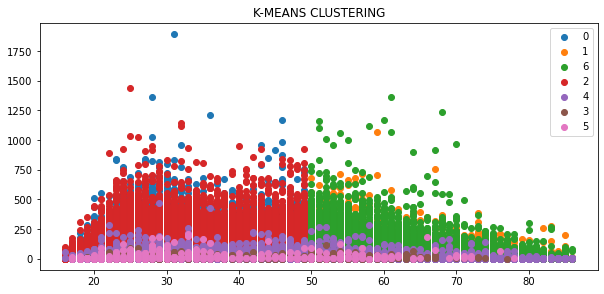

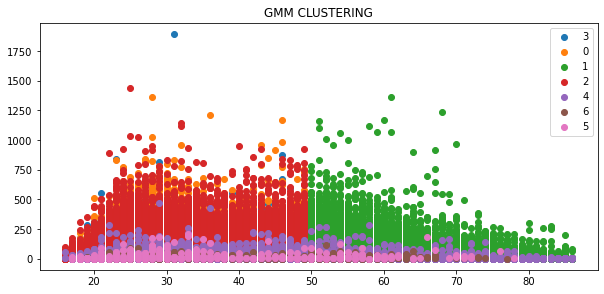

In [ ]:
#k-means 거래횟수 산포도

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)

for c in df_cus2['kmeans_labels'].unique():
    x = df_cus2['age'][df_cus2['kmeans_labels']==c]
    y = df_cus2['#Transactions'][df_cus2['kmeans_labels']==c]
    plt.scatter(x, y, label=c)

plt.title("K-MEANS CLUSTERING")
plt.legend()
plt.show()


#GMM 거래횟수 산포도
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 2)

for c in df_cus2['gmm_cluter_labels'].unique():
    x = df_cus2['age'][df_cus2['gmm_cluter_labels']==c]
    y = df_cus2['#Transactions'][df_cus2['gmm_cluter_labels']==c]
    plt.scatter(x, y, label=c)

plt.title("GMM CLUSTERING")
plt.legend()
plt.show()

#df_cus2의 유이한 연속형 변수인 '연령'과 '거래횟수'에 대한 산포도를 봤을 때 두 clsutering model이 유사하게 군집화하였다는 사실을 확인

그러나, 다른 범주형 변수들에 대한 구분이 GMM model보다 명확하지 않음(특히, sales_channel_id)

--> GMM model 선택

In [ ]:
#그룹핑
grouped = df_cus2.groupby('kmeans_labels')

In [ ]:
#그룹별 연령 평균
grouped.mean()['age']

kmeans_labels
0    29.750766
1    56.948516
2    29.854068
3    39.676259
4    40.850341
5    34.012959
6    57.574710
Name: age, dtype: float64

In [ ]:
#그룹별 거래횟수 평균
grouped.mean()['#Transactions']

kmeans_labels
0    23.032542
1    19.429391
2    29.946303
3    12.334532
4     7.270618
5    18.395248
6    26.240088
Name: #Transactions, dtype: float64

<span style="color:red">sales_channel_id가 군집별로 clear하게 구분되지 못하고 mixed되어 있음</span>

In [ ]:
#그룹별 선호 채널
df_cus2.groupby(['kmeans_labels', 'sales_channel_id']).count() #2 : offline / 1 : online

customer_id  club_member_status  \
kmeans_labels sales_channel_id                                    
0             1                      207724              207724   
              2                      404031              404031   
1             1                       62868               62868   
              2                      102990              102990   
2             1                      139308              139308   
              2                      208312              208312   
3             1                         459                 459   
              2                         375                 375   
4             1                          61                  61   
              2                       83215               83215   
5             1                          40                  40   
              2                         423                 423   
6             1                       52540               52540   
              2                       66433               66433   

                                fashion_news_frequency     age  age_group  \
kmeans_labels sales_channel_id                                              
0             1                                 207724  207724     207724   
              2                                 404031  404031     404031   
1             1                                  62868   62868      62868   
              2                                 102990  102990     102990   
2             1                                 139308  139308     139308   
              2                                 208312  208312     208312   
3             1                                    459     459        459   
              2                                    375     375        375   
4             1                                     61      61         61   
              2                                  83215   83215      83215   
5             1                                     40      40         40   
              2                                    423     423        423   
6             1                                  52540   52540      52540   
              2                                  66433   66433      66433   

                                #Transactions  ACTIVE  LEFTCLUB  PRE-CREATE  \
kmeans_labels sales_channel_id                                                
0             1                        207724  207724    207724      207724   
              2                        404031  404031    404031      404031   
1             1                         62868   62868     62868       62868   
              2                        102990  102990    102990      102990   
2             1                        139308  139308    139308      139308   
              2                        208312  208312    208312      208312   
3             1                           459     459       459         459   
              2                           375     375       375         375   
4             1                            61      61        61          61   
              2                         83215   83215     83215       83215   
5             1                            40      40        40          40   
              2                           423     423       423         423   
6             1                         52540   52540     52540       52540   
              2                         66433   66433     66433       66433   

                                Monthly  ...  LEFTCLUB  PRE-CREATE  Monthly  \
kmeans_labels sales_channel_id           ...                                  
0             1                  207724  ...    207724      207724   207724   
              2                  404031  ...    404031      404031   404031   
1             1                   62868  ...     62868       62868    62868   
              2                  102990  ...    102990      102990

In [ ]:
#그룹별 클럽가입여부
df_cus2.groupby(['kmeans_labels', 'club_member_status']).count()

customer_id  fashion_news_frequency     age  \
kmeans_labels club_member_status                                                
0             ACTIVE                   611755                  611755  611755   
1             ACTIVE                   165858                  165858  165858   
2             ACTIVE                   347620                  347620  347620   
3             ACTIVE                      775                     775     775   
              PRE-CREATE                   59                      59      59   
4             PRE-CREATE                83276                   83276   83276   
5             LEFT CLUB                   463                     463     463   
6             ACTIVE                   118973                  118973  118973   

                                  age_group  #Transactions  sales_channel_id  \
kmeans_labels club_member_status                                               
0             ACTIVE                 611755         611755            611755   
1             ACTIVE                 165858         165858            165858   
2             ACTIVE                 347620         347620            347620   
3             ACTIVE                    775            775               775   
              PRE-CREATE                 59             59                59   
4             PRE-CREATE              83276          83276             83276   
5             LEFT CLUB                 463            463               463   
6             ACTIVE                 118973         118973            118973   

                                  ACTIVE  LEFTCLUB  PRE-CREATE  Monthly  ...  \
kmeans_labels club_member_status                                         ...   
0             ACTIVE              611755    611755      611755   611755  ...   
1             ACTIVE              165858    165858      165858   165858  ...   
2             ACTIVE              347620    347620      347620   347620  ...   
3             ACTIVE                 775       775         775      775  ...   
              PRE-CREATE              59        59          59       59  ...   
4             PRE-CREATE           83276     83276       83276    83276  ...   
5             LEFT CLUB              463       463         463      463  ...   
6             ACTIVE              118973    118973      118973   118973  ...   

                                  LEFTCLUB  PRE-CREATE  Monthly    None  \
kmeans_labels club_member_status                                          
0             ACTIVE                611755      611755   611755  611755   
1             ACTIVE                165858      165858   165858  165858   
2             ACTIVE                347620      347620   347620  347620   
3             ACTIVE                   775         775      775     775   
              PRE-CREATE                59          59       59      59   
4             PRE-CREATE             83276       83276    83276   83276   
5             LEFT CLUB                463         463      463     463   
6             ACTIVE                118973      118973   118973  118973   

                                  Regularly  Non-Target  Target  online  \
kmeans_labels club_member_status                                          
0             ACTIVE                 611755      611755  611755  611755   
1             ACTIVE                 165858      165858  165858  165858   
2             ACTIVE                 347620      347620  347620  347620   
3             ACTIVE                    775         775     775     775   
              PRE-CREATE                 59          59      59      59   
4             PRE-CREATE              83276       83276   83276   83276   
5             LEFT CLUB                 463         463     463     463   
6             ACTIVE                 118973      118973  118973  118973   

                                  offline  gmm_cluter_labels  
kmeans_labels club_member_status                        

In [ ]:
#그룹별 패션뉴스빈도
df_cus2.groupby(['kmeans_labels', 'fashion_news_frequency']).count()

customer_id  club_member_status     age  \
kmeans_labels fashion_news_frequency                                            
0             NONE                         611755              611755  611755   
1             NONE                         165858              165858  165858   
2             Regularly                    347620              347620  347620   
3             Monthly                         834                 834     834   
4             NONE                          77602               77602   77602   
              Regularly                      5674                5674    5674   
5             NONE                            456                 456     456   
              Regularly                         7                   7       7   
6             Regularly                    118973              118973  118973   

                                      age_group  #Transactions  \
kmeans_labels fashion_news_frequency                             
0             NONE                       611755         611755   
1             NONE                       165858         165858   
2             Regularly                  347620         347620   
3             Monthly                       834            834   
4             NONE                        77602          77602   
              Regularly                    5674           5674   
5             NONE                          456            456   
              Regularly                       7              7   
6             Regularly                  118973         118973   

                                      sales_channel_id  ACTIVE  LEFTCLUB  \
kmeans_labels fashion_news_frequency                                       
0             NONE                              611755  611755    611755   
1             NONE                              165858  165858    165858   
2             Regularly                         347620  347620    347620   
3             Monthly                              834     834       834   
4             NONE                               77602   77602     77602   
              Regularly                           5674    5674      5674   
5             NONE                                 456     456       456   
              Regularly                              7       7         7   
6             Regularly                         118973  118973    118973   

                                      PRE-CREATE  Monthly  ...  LEFTCLUB  \
kmeans_labels fashion_news_frequency                       ...             
0             NONE                        611755   611755  ...    611755   
1             NONE                        165858   165858  ...    165858   
2             Regularly                   347620   347620  ...    347620   
3             Monthly                        834      834  ...       834   
4             NONE                         77602    77602  ...     77602   
              Regularly                     5674     5674  ...      5674   
5             NONE                           456      456  ...       456   
              Regularly                        7        7  ...         7   
6             Regularly                   118973   118973  ...    118973   

                                      PRE-CREATE  Monthly    None  Regularly  \
kmeans_labels fashion_news_frequency                                           
0             NONE                        611755   611755  611755     611755   
1             NONE                        165858   165858  165858     165858   
2             Regularly                   347620   347620  347620     347620   
3             Monthly                        834      834     834        834   
4             NONE                         77602    77602   77602      77602   
              Regularly                     5674     5674    5674       5674   
5             NONE                           456      456     456        456   
              Regularly  